# 심혈관 질환 예측 - EDA 및 전처리

## 데이터 설명

* Kaggle dataset "Cadriovascular Disease dataset"

    https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=voteCount

1. age: 나이 (태어난 날짜)
2. gender: 성별 (1: 여, 2: 남)
3. height: 키 (cm)
4. weight: 무게 (kg)
5. ap_hi: 수축기 혈압
6. ap_hi: 이완기 혈압
7. cholesterol: 콜레스테롤 (1: 정상, 2: 정상보다 높음, 3:정상보다 매우 높음)
8. gluc: 포도당 (1: 정상, 2: 정상보다 높음, 3: 정상보다 매우 높음)
9. smoke: 흡연 (1: 흡연자, 0: 비흡연자)
10. alco: 알콜 섭취 (1: 섭취 함, 0: 섭취하지 않음)
11. active: 신체 활동 (1: 활동 있음, 0: 활동하지 않음)
12. 심혈관 질환 유무 (1: 유, 0: 무)

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 데이터 분포, 결측치 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

# numerical data: 'age', 'height', 'weight', 'ap_hi', 'ap_lo'

# categorical data: 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'

# target data: 'cardio'

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

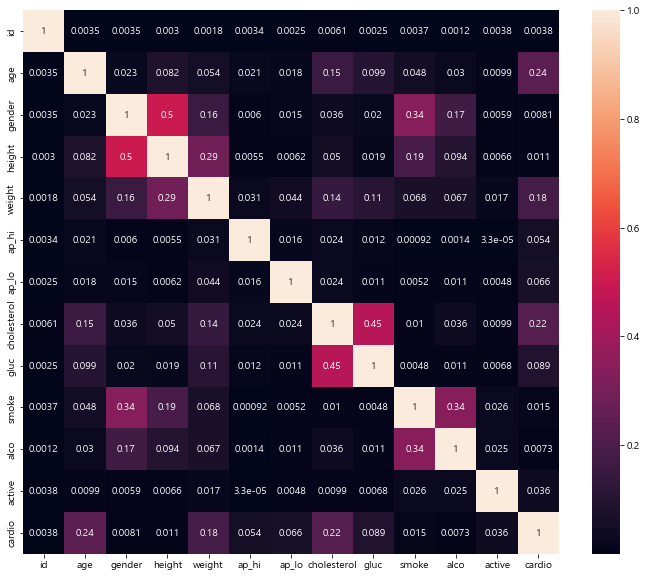

In [20]:
# gender-height, cholesterol-gluc가 가장 관령성이 높다.
# 우리의 target data 'cardio'와 상관관계가 높은 column이 없으므로 모든 column을 사용해도 괜찮을 것이다.

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True)
plt.show()

## 데이터 분석 및 전처리

### 'age' column

In [84]:
# age column의 단위가 날짜이므로 직관적으로 알 수 있는 '나이' 단위 컬럼을 추가시켜준다.
df_age = df.copy()

df_age['years'] = df['age'].apply(lambda x : int(x/365))
df_age

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


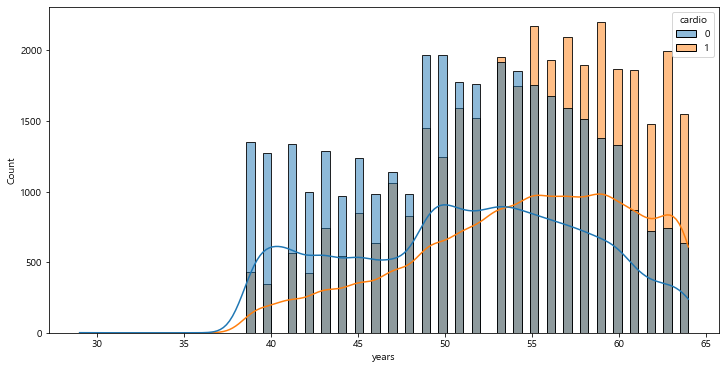

In [85]:
# 55세 이상이 심혈관 질환에 걸릴 확률이 높음을 알 수 있다.

plt.figure(figsize=(12,6))
sns.histplot(data=df_age, x='years', hue='cardio', kde=True)
plt.show()

## Categorical columns -'gendet', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'

In [99]:
df_categorical = df.loc[:, ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

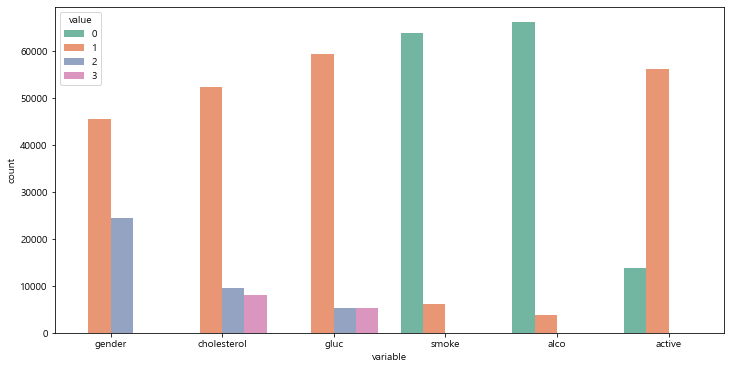

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(data= pd.melt(df_categorical), x="variable", hue="value", palette="Set2")
plt.show()

<Figure size 1008x432 with 0 Axes>

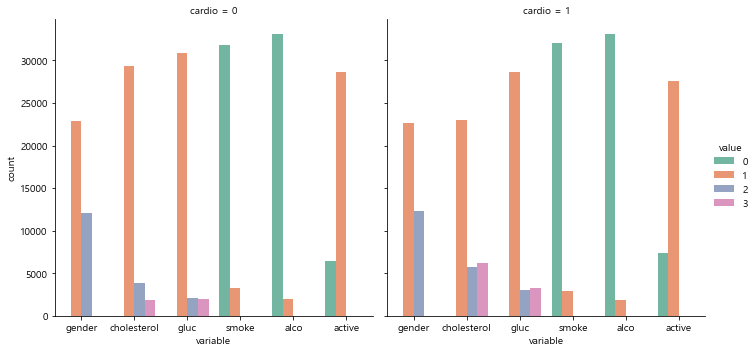

In [109]:
# cholesterol, gluc가 높은 사람들은 눈에띄게 CVD에 걸린 사람이 더 많음을 알 수 있다.

df_long = pd.melt(df, id_vars=['cardio'], value_vars=['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active'])

plt.figure(figsize=(14,6))
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count", palette='Set2')
plt.show()

## 'height', 'weight' columns

In [187]:
# max값으로 키가 250cm, 몸무게가 200kg인 데이터가 존재하므로 이상치인지 확인해본다.
# 마찬가지로 몸무게가 10인 데이터가 있으므로 확인해준다.
df.loc[:,['height', 'weight']].describe()

,height,weight
count,70000.000000,70000.000000
mean,164.359229,74.205690
std,8.210126,14.395757
min,55.000000,10.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,250.000000,200.000000


<AxesSubplot:ylabel='weight'>

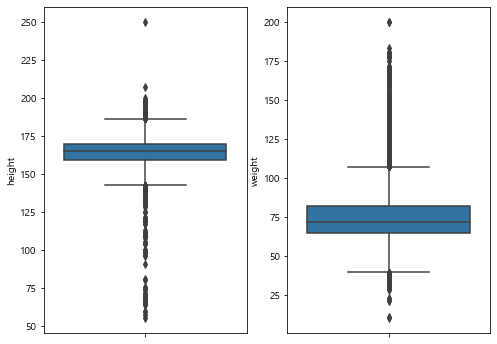

In [188]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='height')

plt.subplot(1,2,2)
sns.boxplot(data=df, y='weight')

In [189]:
print(df.weight.quantile(0.00012))
print(df.weight.quantile(0.999))

30.0
150.0


In [190]:
print(df.height.quantile(0.001))
print(df.height.quantile(0.999))

120.0
190.0


In [251]:
# 위의 키, 몸무게 값을 이상치의 기준으로 삼아 데이터를 삭제해준다.

df.drop(df[(df['height'] > df['height'].quantile(0.999)) | (df['height'] < df['height'].quantile(0.001))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.999)) | (df['weight'] < df['weight'].quantile(0.00012))].index,inplace=True)

In [252]:
# 약 200개 data drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69807 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69807 non-null  int64  
 1   age          69807 non-null  int64  
 2   gender       69807 non-null  int64  
 3   height       69807 non-null  int64  
 4   weight       69807 non-null  float64
 5   ap_hi        69807 non-null  int64  
 6   ap_lo        69807 non-null  int64  
 7   cholesterol  69807 non-null  int64  
 8   gluc         69807 non-null  int64  
 9   smoke        69807 non-null  int64  
 10  alco         69807 non-null  int64  
 11  active       69807 non-null  int64  
 12  cardio       69807 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


## 'ap_lo', 'ap_hi' columns

In [193]:
# 평균과 75%값에 비해 max값이 매우 높으므로 이상치로 판단하여 삭제해준다.
# 혈압은 음수 값이 나올 수 없으므로 음수 값이 나온 데이터도 삭제시켜준다.
df.loc[:,['ap_lo', 'ap_hi']].describe()

,ap_lo,ap_hi
count,69807.000000,69807.000000
mean,96.582277,128.809618
std,188.522664,154.218294
min,-70.000000,-150.000000
25%,80.000000,120.000000
50%,80.000000,120.000000
75%,90.000000,140.000000
max,11000.000000,16020.000000


In [253]:
print(df.ap_hi.quantile(0.998))
print(df.ap_lo.quantile(0.986))

200.0
140.0


In [254]:
# 혈압 값이 최고혈압의 기준 이상이거나 최저혈압 이하, 음수값으면 삭제시켜준다

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.998)) | (df['ap_hi'] < 50)].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.986)) | (df['ap_lo'] < 40)].index,inplace=True)

<AxesSubplot:ylabel='ap_lo'>

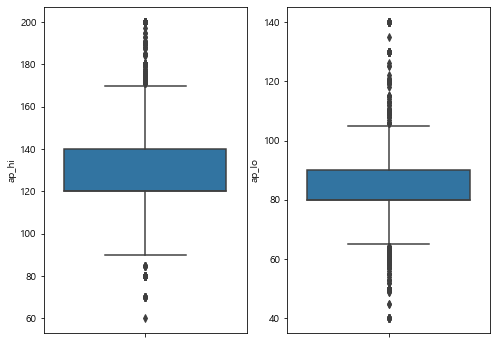

In [255]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='ap_hi')

plt.subplot(1,2,2)
sns.boxplot(data=df, y='ap_lo')

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68514 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68514 non-null  int64  
 1   age          68514 non-null  int64  
 2   gender       68514 non-null  int64  
 3   height       68514 non-null  int64  
 4   weight       68514 non-null  float64
 5   ap_hi        68514 non-null  int64  
 6   ap_lo        68514 non-null  int64  
 7   cholesterol  68514 non-null  int64  
 8   gluc         68514 non-null  int64  
 9   smoke        68514 non-null  int64  
 10  alco         68514 non-null  int64  
 11  active       68514 non-null  int64  
 12  cardio       68514 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


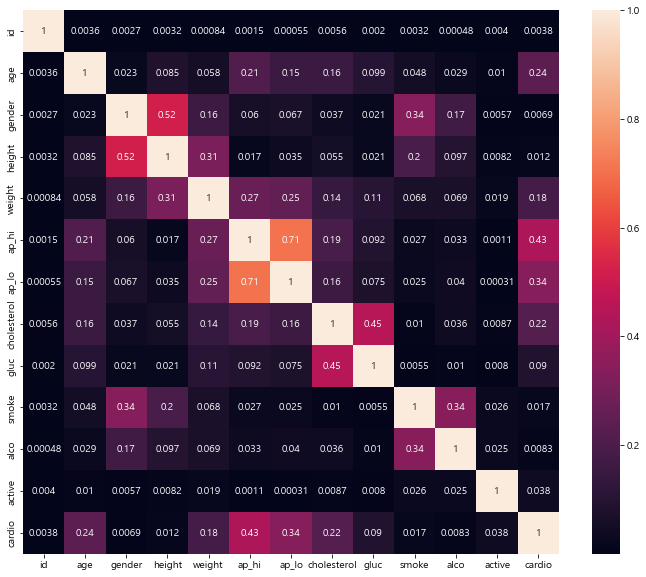

In [257]:
# 전처리 후 heatmap
# ap_hi, ap_lo와 cardio의 상관관계 값이 높아졌다.

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True)
plt.show()

In [259]:
# 전처리가 완료된 데이터 저장

df.to_csv('train.csv')